In [1]:
# Import one for all
from src.anomaly_detection import AnomalyDetection
#create an instance of the Anomaly Detection class
ad = AnomalyDetection()

Using TensorFlow backend.


## Searching for a point

- valid query strings may include wild cards **'*'**
- `show_points_found` : additional parameter default True that will display all the points found in the query
- This method will only select the first point in the list of points found, if another point is desired, then just copy the name of the point you wish to use and paste it into `ad.find_point('point_name')`
- This method will also determine the type of point from: **ELECTRICITY**, **STEAM**, **CHILLEDWATER** and **OTHER** to correspond to pre-determined metrics for each type of tag.

In [2]:
ad.find_point('well*elec*kbtu', show_points_found = True)

Point Used: Wellman_Kerr_Electricity_Demand_kBtu
Point Type: ELECTRICITY

Points Found:
1- Wellman_Kerr_Electricity_Demand_kBtu


## Downloading PI Data
This step will download the respective point's data from `'2016-01-01'` which will provide the model enough data to learn and make more accurate predictions. If any of the parameters such as `'start'`, `'end'`, `'interval'` want to be changed, then the `lstmconfig.ini` file needs to be changed accordingly

Grabbing WebIDs ...
WebID collection complete!
10:52:19: Sending API request... Chunk 1 of 1
10:52:20: Response recieved for 1 tags! (0.65)


Column                              |Percent NaN | Rows NaN/Total Rows
----------------------------------------------------------------------
Wellman_Kerr_Electricity_Demand_kBtu|  0.03 %    | 5/14960


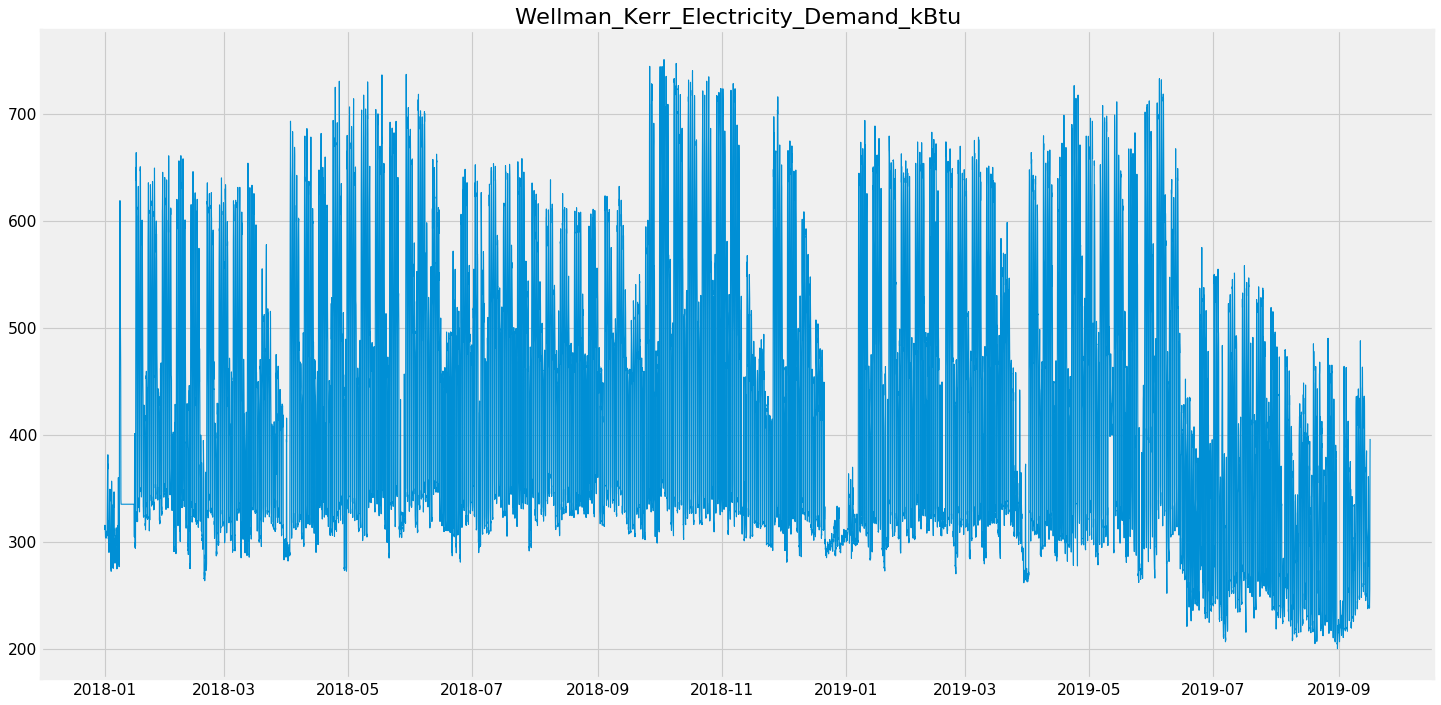

In [3]:
ad.download_point_data()
#this shows the graph (big plot)

## Cleaning the training data
This step will identify really 'bad' points and remove them from the dataset

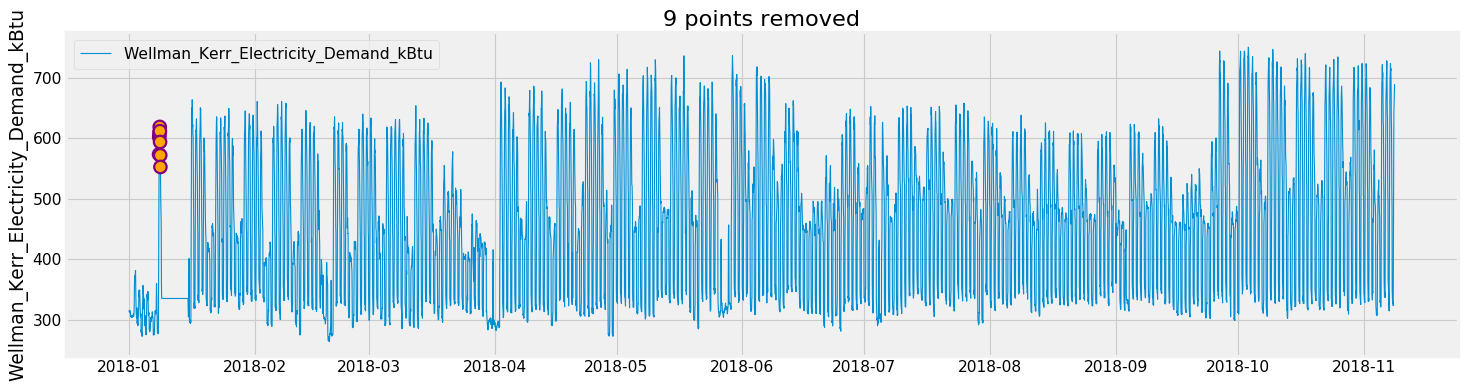

In [4]:
ad.clean_data()
#Plot stars what is going to be cleaned but not thresholds (thin)

Grabbing WebIDs ...
WebID collection complete!
10:52:22: Sending API request... Chunk 1 of 1
10:52:24: Response recieved for 3 tags! (2.76)
Removed: 0 rows
Train on 3740 samples, validate on 3741 samples
Epoch 1/10
3740/3740 [==============================] - 2s 518us/step - loss: 0.2272 - val_loss: 0.1765
Epoch 2/10
3740/3740 [==============================] - 1s 156us/step - loss: 0.1200 - val_loss: 0.0423
Epoch 3/10
3740/3740 [==============================] - 1s 155us/step - loss: 0.0282 - val_loss: 0.0155
Epoch 4/10
3740/3740 [==============================] - 1s 155us/step - loss: 0.0213 - val_loss: 0.0143
Epoch 5/10
3740/3740 [==============================] - 1s 155us/step - loss: 0.0196 - val_loss: 0.0135
Epoch 6/10
3740/3740 [==============================] - 1s 162us/step - loss: 0.0179 - val_loss: 0.0127
Epoch 7/10
3740/3740 [==============================] - 1s 154us/step - loss: 0.0162 - val_loss: 0.0117
Epoch 8/10
3740/3740 [==============================] - 1s 156us/ste

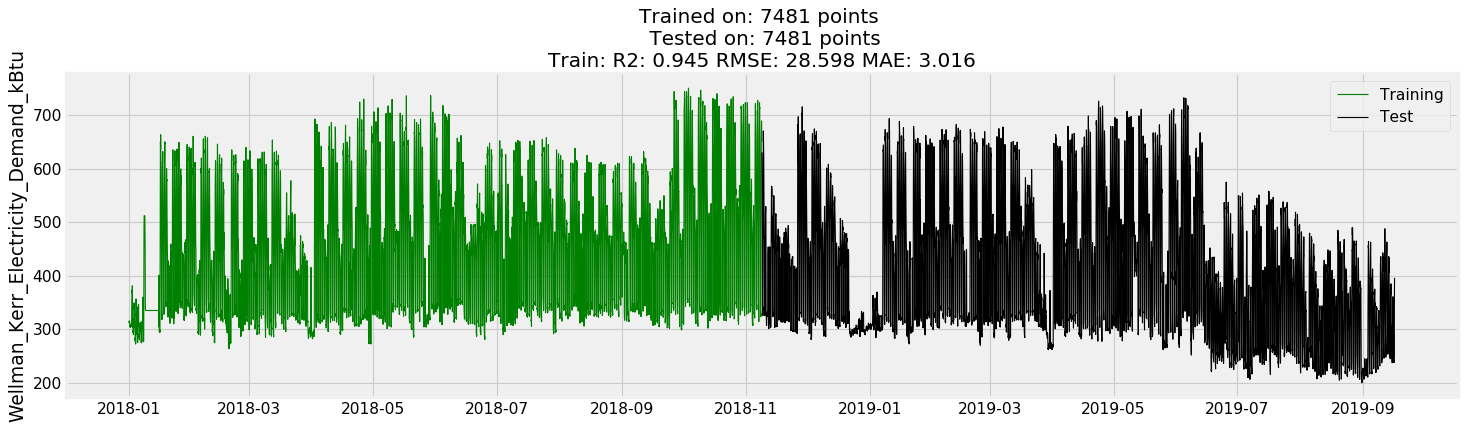

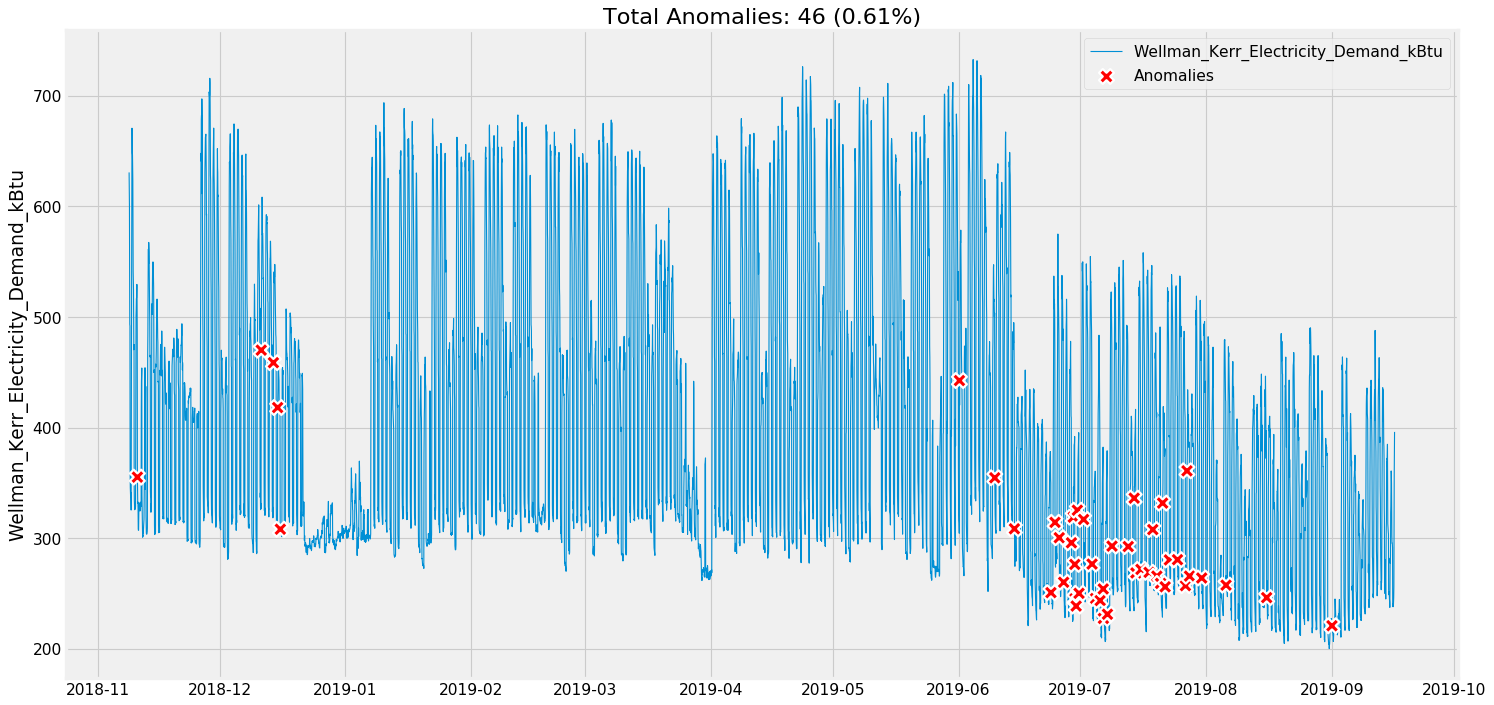

In [5]:
ad.run_neural_network(show_neural_network_running = True, epochs = 10)
#1. plot train/test split with R2, RMSE, MAE (thin)
#2. plot anomalies found (big plot)

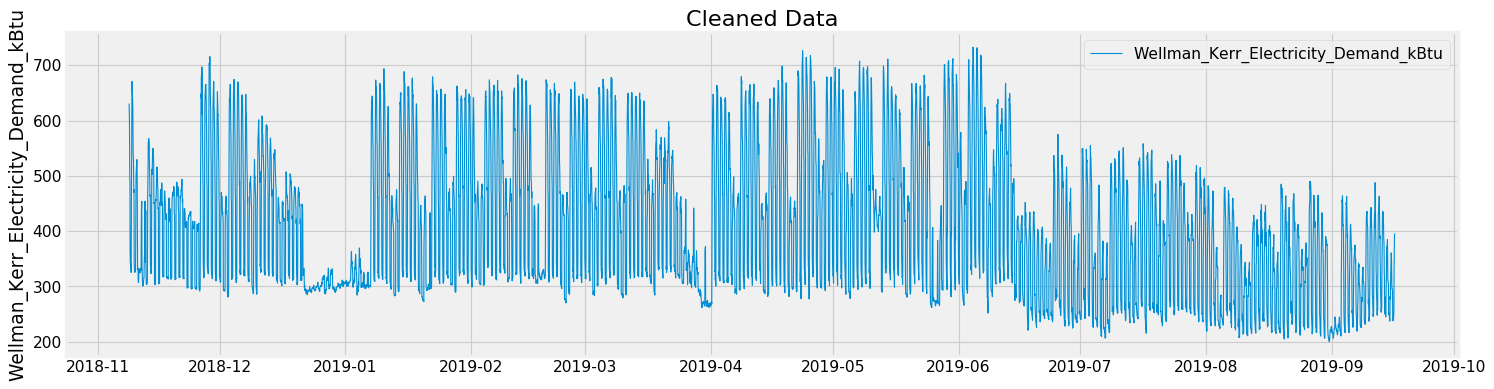

In [6]:
#remove anomalies?
ad.remove_anomalies()

In [7]:
ad.results_data.loc[ad.results_data.Anomalies == 1].tail()

,Actual,Modeled,Result,Anomalies
Timestamp,,,,
2019-07-27 21:00:00,265.681768,372.741045,107.059278,1
2019-07-30 21:00:00,263.955722,372.380921,108.425199,1
2019-08-05 21:00:00,257.517666,365.519253,108.001587,1
2019-08-15 21:00:00,246.236051,362.866615,116.630564,1
2019-08-31 23:00:00,220.802907,118.598452,-102.204455,1


In [ ]:
#save anomalies?
# None saves them all
# ['Actual',  'Modeled', 'Result', 'Anomalies']
# This will save a csv file as '{point_name}_Anomalies_{'YYYYMMDD HHMM'}.csv'
#ad.save(which= ['Actual',  'Modeled', 'Result', 'Anomalies'])